# import libraries

In [2]:
import torch
import numpy as np
import cv2
import os
from ultralytics import YOLO
import pandas as pd

# training model

In [3]:
model = YOLO('yolo11x.pt')

# Train the model
train_results = model.train(
    data='data.yaml',  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    batch=2,
    device=0,  
    task='detect',  # Specify task as segmentation
)


Ultralytics 8.3.21  Python-3.9.15 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11x.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning F:\datasets\train\labels.cache... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<?, ?it/s]

train: WARNING  F:\datasets\train\images\no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
WARNING  Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning F:\datasets\val\labels.cache... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.72G      1.359       2.79      1.681          2        640: 100%|██████████| 685/685 [02:42<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.50it/s]


                   all        395        415      0.488      0.374      0.167     0.0987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.29G      1.303      1.998       1.64          2        640: 100%|██████████| 685/685 [02:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:12<00:00,  7.83it/s]

                   all        395        415        0.7      0.328       0.32      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       3.3G      1.247      1.799      1.557          2        640: 100%|██████████| 685/685 [02:32<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.37it/s]

                   all        395        415      0.248      0.406      0.318      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.29G      1.186       1.61      1.506          3        640: 100%|██████████| 685/685 [02:37<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.56it/s]

                   all        395        415       0.55      0.409      0.424      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.29G      1.072      1.457      1.402          2        640: 100%|██████████| 685/685 [02:33<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.16it/s]

                   all        395        415      0.582      0.392      0.441      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.29G      1.014      1.354      1.358          2        640: 100%|██████████| 685/685 [02:36<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:14<00:00,  7.02it/s]

                   all        395        415      0.633      0.423      0.472       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.29G     0.9508      1.237      1.322          2        640: 100%|██████████| 685/685 [02:33<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.43it/s]

                   all        395        415       0.66      0.429      0.502      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.29G     0.9107      1.183      1.293          2        640: 100%|██████████| 685/685 [02:32<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.41it/s]

                   all        395        415      0.613      0.467      0.519      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.29G     0.8245      1.089       1.22          2        640: 100%|██████████| 685/685 [02:32<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.33it/s]

                   all        395        415      0.734      0.524      0.524      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.29G     0.7944      1.042      1.204          2        640: 100%|██████████| 685/685 [02:31<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:13<00:00,  7.48it/s]

                   all        395        415      0.605      0.548      0.559      0.432



10 epochs completed in 0.486 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 114.4MB
Optimizer stripped from runs\detect\train\weights\best.pt, 114.4MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.21  Python-3.9.15 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11x summary (fused): 464 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:11<00:00,  8.73it/s]


                   all        395        415      0.606      0.548      0.559      0.433
              NO_tumor        115        116      0.783      0.922      0.918      0.693
                glioma         30         36      0.972      0.167      0.354      0.262
            meningioma        144        148      0.682      0.851      0.856      0.719
             pituitary        106        111      0.592      0.802      0.666      0.489
space-occupying lesion-          1          4          0          0          0          0
Speed: 0.4ms preprocess, 21.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train


In [3]:
model = YOLO("F:\\final_project\\tumor-detection\\runs\\detect\\train\\weights\\best.pt")

result = model("F:\\final_project\\tumor-detection\\test\\images\\meningioma_1145_jpg.rf.14cad1f9efb3cad690ed0048b9172566.jpg")


image 1/1 F:\final_project\tumor-detection\test\images\meningioma_1145_jpg.rf.14cad1f9efb3cad690ed0048b9172566.jpg: 640x640 1 meningioma, 174.0ms
Speed: 7.5ms preprocess, 174.0ms inference, 280.6ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
bimg = result[0].plot()
cv2.imshow('img',bimg)
cv2.waitKey(0)



-1

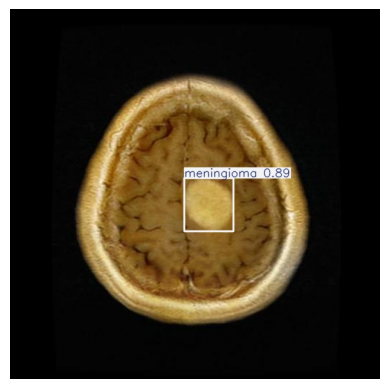

In [26]:
img = cv2.imread("F:\\datasets\\runs\\detect\\predict2\\meningioma_323_jpg.rf.7d2c9c94a9e41d9ffd266795cad9ab06.jpg")
rgb =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(rgb)
plt.axis(False)
plt.show()